In [8]:
import sys
sys.path.append('../../Codes/lib/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import scipy.special as sc
import pandas as pd
from funcs import*
N_A = 6.02214076e23
Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Immune_System/primary_response/'

%autosave 60

Autosaving every 60 seconds


In [9]:
def plot_energy_matrix(Energy_Matrix, Alphabet_C, Alphabet_R, title, ax):

	M = Energy_Matrix
	sns.heatmap(np.flip(M, axis = 0), ax = ax, cmap=plt.cm.seismic, center = 0, cbar = True)
	ax.set_title(title, fontsize = 22)
	ax.tick_params(labelsize = 20)
	ax.set_xticklabels(Alphabet_C)
	ax.set_yticklabels(np.flip(Alphabet_R));
	cbar = ax.collections[0].colorbar
	cbar.ax.tick_params(labelsize=18)

In [13]:
TCRen = pd.read_csv(Text_files_path+'in/TCRen_potential_old.csv')
#print(TCRen)
amino_acids_C = ["S", "T", "P", "A", "G", "N", "D", "E", "Q", "H", "R", "K", "M", "I", "L", "V", "F", "Y", "W"]
amino_acids_R = ["C", "S", "T", "P", "A", "G", "N", "D", "E", "Q", "H", "R", "K", "M", "I", "L", "V", "F", "Y", "W"]
print(len(amino_acids_C))
TCRen_dict = dict()

alphabet_from  = np.unique(TCRen['residue.aa.from'])
alphabet_to  = np.unique(TCRen['residue.aa.to'])
for i in range(len(alphabet_from)):
    TCRen_dict[alphabet_from[i]] = dict()
for i in range(len(TCRen)):
    residue_from = TCRen['residue.aa.from'][i]
    residue_to = TCRen['residue.aa.to'][i]
    TCRen_dict[residue_from][residue_to] = TCRen['TCRen'][i]
#TCRen_dict

19


In [14]:
TCR_matrix = np.zeros((20, 19))
for i, aa1 in enumerate(amino_acids_C):
    for j, aa2 in enumerate(amino_acids_R):
        TCR_matrix[j, i] = TCRen_dict[aa1][aa2]
print(np.size(TCR_matrix))

380


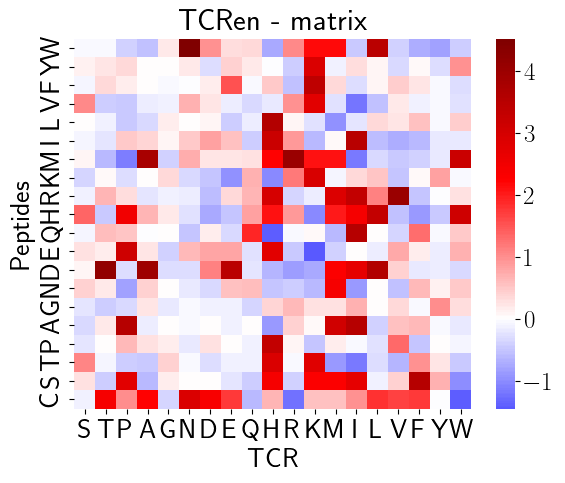

In [15]:
fig, ax = plt.subplots()
plot_energy_matrix(Energy_Matrix=TCR_matrix, Alphabet_C=amino_acids_C, Alphabet_R=amino_acids_R, title=r'TCRen - matrix', ax = ax)
ax.set_xlabel('TCR', fontsize = '20')
ax.set_ylabel('Peptides', fontsize = '20');
